(10000, 51, 1)
(1000, 1)
Epoch 1/5
219/219 [==============================] - 2s 10ms/step - loss: 0.0107 - last_time_step_mse: 0.0107 - val_loss: 0.0041 - val_last_time_step_mse: 0.0041
Epoch 2/5
219/219 [==============================] - 2s 8ms/step - loss: 0.0039 - last_time_step_mse: 0.0039 - val_loss: 0.0041 - val_last_time_step_mse: 0.0041
Epoch 3/5
219/219 [==============================] - 2s 9ms/step - loss: 0.0038 - last_time_step_mse: 0.0038 - val_loss: 0.0043 - val_last_time_step_mse: 0.0043
Epoch 4/5
219/219 [==============================] - 2s 9ms/step - loss: 0.0037 - last_time_step_mse: 0.0037 - val_loss: 0.0034 - val_last_time_step_mse: 0.0034
Epoch 5/5
219/219 [==============================] - 2s 9ms/step - loss: 0.0037 - last_time_step_mse: 0.0037 - val_loss: 0.0033 - val_last_time_step_mse: 0.0033


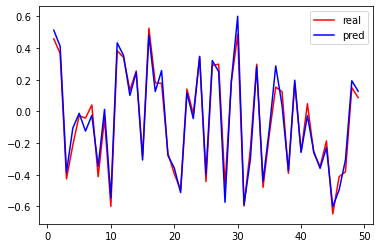

In [1]:
#预测时间序列
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
def generate_time_series(batch_size,n_steps):
    freq1,freq2,offsets1,offsets2 = np.random.rand(4,batch_size,1)
    time = np.linspace(0,1,n_steps)
    series = 0.5*np.sin((time-offsets1)*(freq1*10+10))
    series += 0.2*np.sin((time-offsets2)*(freq2*20+20))    
    series += 0.1*(np.random.rand(batch_size,n_steps)-0.5)
    return series[...,np.newaxis].astype(np.float32)
n_steps = 50
series = generate_time_series(10000,n_steps+1)
print(series.shape)
x_train,y_train = series[:7000,:n_steps],series[:7000,-1]
x_valid,y_valid = series[7000:9000,:n_steps],series[7000:9000,-1]
x_test,y_test = series[9000:,:n_steps],series[9000:,-1]
print(y_test.shape)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20,return_sequences=True,input_shape=[None,1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

def last_time_step_mse(y_true,y_pred):
    return keras.metrics.mean_squared_error(y_true[:,-1],y_pred[:,-1])
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss='mse',optimizer=optimizer,metrics=[last_time_step_mse])
model.fit(x_train,y_train,epochs=5,validation_data=(x_valid,y_valid))
y_test_pre = model.predict(x_test)
plt.plot(range(1,50),y_test[:49],'r')
plt.plot(range(1,50),y_test_pre[:49],'b')
plt.legend(['real','pred'])
plt.show()

(1000, 50, 1) (1000, 10)
Epoch 1/10
219/219 [==============================] - 2s 10ms/step - loss: 0.0444 - last_time_step_mse: 0.0655 - val_loss: 0.0334 - val_last_time_step_mse: 0.0543
Epoch 2/10
219/219 [==============================] - 2s 9ms/step - loss: 0.0297 - last_time_step_mse: 0.0514 - val_loss: 0.0258 - val_last_time_step_mse: 0.0403
Epoch 3/10
219/219 [==============================] - 2s 9ms/step - loss: 0.0285 - last_time_step_mse: 0.0492 - val_loss: 0.0206 - val_last_time_step_mse: 0.0327
Epoch 4/10
219/219 [==============================] - 2s 9ms/step - loss: 0.0240 - last_time_step_mse: 0.0417 - val_loss: 0.0208 - val_last_time_step_mse: 0.0304
Epoch 5/10
219/219 [==============================] - 2s 9ms/step - loss: 0.0224 - last_time_step_mse: 0.0391 - val_loss: 0.0153 - val_last_time_step_mse: 0.0302
Epoch 6/10
219/219 [==============================] - 2s 9ms/step - loss: 0.0168 - last_time_step_mse: 0.0307 - val_loss: 0.0128 - val_last_time_step_mse: 0.0296
Ep

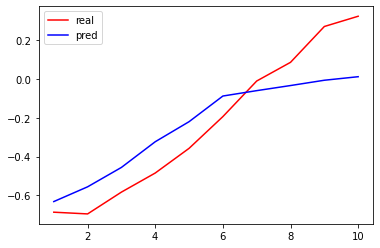

In [2]:
#连续预测10个值
series = generate_time_series(10000,n_steps+10)
x_train,y_train = series[:7000,:n_steps],series[:7000,-10:,0]
x_valid,y_valid = series[7000:9000,:n_steps],series[7000:9000,-10:,0]
x_test,y_test = series[9000:,:n_steps],series[9000:,-10:,0]
print(x_test.shape,y_test.shape)
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20,return_sequences=True,input_shape=[None,1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

def last_time_step_mse(y_true,y_pred):
    return keras.metrics.mean_squared_error(y_true[:,-1],y_pred[:,-1])
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss='mse',optimizer=optimizer,metrics=[last_time_step_mse])
model.fit(x_train,y_train,epochs=10,validation_data=(x_valid,y_valid))
y_test_pre = model.predict(x_test)
plt.plot(range(1,11),y_test[0],'r')
plt.plot(range(1,11),y_test_pre[0],'b')
plt.legend(['real','pred'])
plt.show()

(10000, 60, 1)
(1000, 50, 10)
Epoch 1/10
219/219 [==============================] - 2s 10ms/step - loss: 0.0511 - last_time_step_mse: 0.0400 - val_loss: 0.0405 - val_last_time_step_mse: 0.0275
Epoch 2/10
219/219 [==============================] - 2s 8ms/step - loss: 0.0378 - last_time_step_mse: 0.0254 - val_loss: 0.0386 - val_last_time_step_mse: 0.0294
Epoch 3/10
219/219 [==============================] - 2s 8ms/step - loss: 0.0328 - last_time_step_mse: 0.0202 - val_loss: 0.0303 - val_last_time_step_mse: 0.0163
Epoch 4/10
219/219 [==============================] - 2s 8ms/step - loss: 0.0298 - last_time_step_mse: 0.0174 - val_loss: 0.0284 - val_last_time_step_mse: 0.0162
Epoch 5/10
219/219 [==============================] - 2s 8ms/step - loss: 0.0278 - last_time_step_mse: 0.0152 - val_loss: 0.0264 - val_last_time_step_mse: 0.0134
Epoch 6/10
219/219 [==============================] - 2s 9ms/step - loss: 0.0256 - last_time_step_mse: 0.0128 - val_loss: 0.0267 - val_last_time_step_mse: 0.01

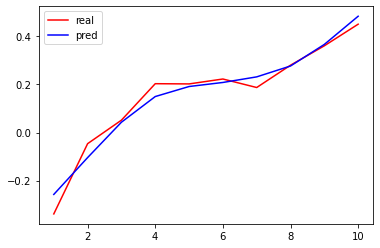

In [3]:
#类似作弊的时间序列预测模型
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
def generate_time_series(batch_size,n_steps):
    freq1,freq2,offsets1,offsets2 = np.random.rand(4,batch_size,1)
    time = np.linspace(0,1,n_steps)
    series = 0.5*np.sin((time-offsets1)*(freq1*10+10))
    series += 0.2*np.sin((time-offsets2)*(freq2*20+20))    
    series += 0.1*(np.random.rand(batch_size,n_steps)-0.5)
    return series[...,np.newaxis].astype(np.float32)
n_steps = 50
series = generate_time_series(10000,n_steps+10)
y = np.empty((10000,n_steps,10))
for step_ahead in range(1,11):
#     print(series[:,step_ahead:step_ahead+n_steps,0].shape)
    y[:,:,step_ahead-1] = series[:,step_ahead:step_ahead+n_steps,0]
x_train,x_valid,x_test = series[:7000,:n_steps],series[7000:9000,:n_steps],series[9000:,:n_steps]
y_train = y[:7000]
y_valid = y[7000:9000]
y_test = y[9000:]
print(series.shape)
print(y_test.shape)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20,return_sequences=True,input_shape=[None,1]),
    keras.layers.SimpleRNN(20,return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

def last_time_step_mse(y_true,y_pred):
    return keras.metrics.mean_squared_error(y_true[:,-1],y_pred[:,-1])
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss='mse',optimizer=optimizer,metrics=[last_time_step_mse])
model.fit(x_train,y_train,epochs=10,validation_data=(x_valid,y_valid))
y_test_pre = model.predict(x_test)
plt.plot(range(1,11),y_test[0,49],'r')
plt.plot(range(1,11),y_test_pre[0,49],'b')
plt.legend(['real','pred'])
plt.show()

Epoch 1/10
219/219 [==============================] - 6s 26ms/step - loss: 0.0760 - last_time_step_mse: 0.0697 - val_loss: 0.0450 - val_last_time_step_mse: 0.0379
Epoch 2/10
219/219 [==============================] - 5s 24ms/step - loss: 0.0416 - last_time_step_mse: 0.0358 - val_loss: 0.0405 - val_last_time_step_mse: 0.0343
Epoch 3/10
219/219 [==============================] - 5s 24ms/step - loss: 0.0371 - last_time_step_mse: 0.0304 - val_loss: 0.0367 - val_last_time_step_mse: 0.0307
Epoch 4/10
219/219 [==============================] - 5s 24ms/step - loss: 0.0345 - last_time_step_mse: 0.0281 - val_loss: 0.0339 - val_last_time_step_mse: 0.0269
Epoch 5/10
219/219 [==============================] - 5s 24ms/step - loss: 0.0337 - last_time_step_mse: 0.0276 - val_loss: 0.0350 - val_last_time_step_mse: 0.0289
Epoch 6/10
219/219 [==============================] - 5s 24ms/step - loss: 0.0322 - last_time_step_mse: 0.0252 - val_loss: 0.0310 - val_last_time_step_mse: 0.0235
Epoch 7/10
219/219 [==

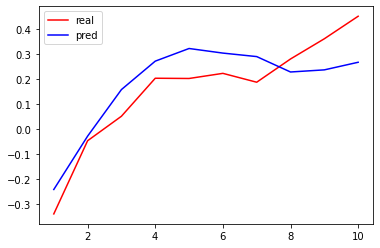

In [6]:
#应对不稳定梯度的问题
class LNSimpleRNNCell(keras.layers.Layer):
    def __init__(self,units,activation='tanh',**kwargs):
        super().__init__(**kwargs)
        self.state_size = units
        self.output_size = units
        self.simple_rnn_cell = keras.layers.SimpleRNNCell(units,activation=None)
        self.layer_norm = keras.layers.LayerNormalization()
        self.activation = keras.activations.get(activation)
    def call(self,inputs,states):
        outputs,new_states = self.simple_rnn_cell(inputs,states)
        norm_outputs = self.activation(self.layer_norm(outputs))
        return norm_outputs,[norm_outputs]
model = keras.models.Sequential([
    keras.layers.RNN(LNSimpleRNNCell(20),return_sequences=True,input_shape=[None,1]),
    keras.layers.RNN(LNSimpleRNNCell(20),return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss='mse',optimizer=optimizer,metrics=[last_time_step_mse])
model.fit(x_train,y_train,epochs=10,validation_data=(x_valid,y_valid))
y_test_pre = model.predict(x_test)
plt.plot(range(1,11),y_test[0,49],'r')
plt.plot(range(1,11),y_test_pre[0,49],'b')
plt.legend(['real','pred'])
plt.show()

In [5]:
#解决短期记忆问题的LSTM单元
model = keras.models.Sequential([
    keras.layers.LSTM(20,return_sequences=True,input_shape=[None,1]),
    keras.layers.LSTM(20,return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model = keras.models.Sequential([
    keras.layers.RNN(keras.layers.LSTMCell(20),return_sequences=True,input_shape=[None,1]),
    keras.layers.RNN(keras.layers.LSTMCell(20),return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

Epoch 1/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0711 - last_time_step_mse: 0.0630 - val_loss: 0.0479 - val_last_time_step_mse: 0.0398
Epoch 2/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0392 - last_time_step_mse: 0.0314 - val_loss: 0.0355 - val_last_time_step_mse: 0.0281
Epoch 3/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0315 - last_time_step_mse: 0.0229 - val_loss: 0.0289 - val_last_time_step_mse: 0.0194
Epoch 4/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0272 - last_time_step_mse: 0.0173 - val_loss: 0.0262 - val_last_time_step_mse: 0.0161
Epoch 5/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0248 - last_time_step_mse: 0.0141 - val_loss: 0.0239 - val_last_time_step_mse: 0.0128
Epoch 6/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0233 - last_time_step_mse: 0.0125 - val_loss: 0.0227 - val_last_time_step_mse: 0.0119
Epoch 7/20
219/219 [==

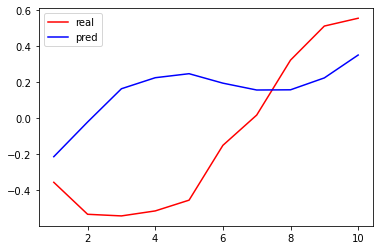

In [13]:
#使用一维卷积层处理序列
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20,kernel_size=4,strides=2,padding='valid',input_shape=[None,1]),
    keras.layers.GRU(20,return_sequences=True),
    keras.layers.GRU(20,return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])
model.compile(loss='mse',optimizer='adam',metrics=[last_time_step_mse])
history = model.fit(x_train,y_train[:,3::2],epochs=20,validation_data=(x_valid,y_valid[:,3::2]))
y_test_pre = model.predict(x_test)
plt.plot(range(1,11),y_test[0,23],'r')
plt.plot(range(1,11),y_test_pre[0,23],'b')
plt.legend(['real','pred'])
plt.show()

Epoch 1/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0626 - last_time_step_mse: 0.0521 - val_loss: 0.0346 - val_last_time_step_mse: 0.0220
Epoch 2/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0315 - last_time_step_mse: 0.0194 - val_loss: 0.0300 - val_last_time_step_mse: 0.0186
Epoch 3/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0280 - last_time_step_mse: 0.0162 - val_loss: 0.0267 - val_last_time_step_mse: 0.0148
Epoch 4/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0266 - last_time_step_mse: 0.0151 - val_loss: 0.0255 - val_last_time_step_mse: 0.0136
Epoch 5/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0251 - last_time_step_mse: 0.0133 - val_loss: 0.0245 - val_last_time_step_mse: 0.0127
Epoch 6/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0243 - last_time_step_mse: 0.0126 - val_loss: 0.0236 - val_last_time_step_mse: 0.0118
Epoch 7/20
219/219 [========

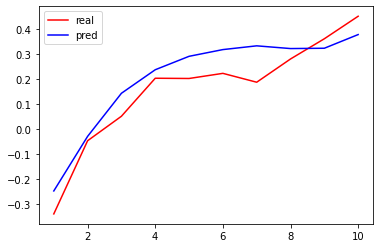

In [16]:
#WaveNet 
model =keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[None,1]))
for rate in (1,2,4,8)*2:
    model.add(keras.layers.Conv1D(filters=20,kernel_size=2,padding='causal',activation='relu',dilation_rate=rate))
model.add(keras.layers.Conv1D(filters=10,kernel_size=1))
model.compile(loss='mse',optimizer='adam',metrics=[last_time_step_mse])
history = model.fit(x_train,y_train,epochs=20,validation_data=(x_valid,y_valid))
y_test_pre = model.predict(x_test)
plt.plot(range(1,11),y_test[0,49],'r')
plt.plot(range(1,11),y_test_pre[0,49],'b')
plt.legend(['real','pred'])
plt.show()